# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Christ Thaddeus
- **Email:** christ.535220196@stu.untar.ac.id / mc325d5y0790@student.devacademy.id
- **ID Dicoding:** mc325d5y0790

## Menentukan Pertanyaan Bisnis

\- Bagaimana suhu mempengaruhi jumlah penyewaan sepeda?
- Bagaimana variasi penyewaan sepeda setiap harinya? apakah ada hari tertentu yang memiliki jumlah penyewaan yang sangat tinggi atau rendah dibandingkan hari lainnya?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Di kode ini , kita mengload file csv yang akan digunakan untuk menjadi dataframe analisis , dan menunjukkan 5 baris pertama untuk memastikan data sudah benar

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Setelah diassess, Sepertinya tidak ada data missing value, duplicate, dll . Namun , terdapat beberapa tipe data yang kurang cocok yang akan kita perbaiki di bagian cleaning data

### Cleaning Data

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

pertama, mengubah date dari object menjadi datetime

In [10]:
categorycols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

day_df[categorycols] = day_df[categorycols].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Mengubah beberapa datatype int menjadi categories untuk kolom yang menggunakan angka sebagai representasi suatu kategori

In [11]:
day_df['weekday'] = day_df['weekday'].cat.rename_categories({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

Menambahkan kategori untuk data yang akan digunakan yaitu data weekday

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df[['temp','cnt']].describe()

,temp,cnt
count,731.000000,731.000000
mean,0.495385,4504.348837
std,0.183051,1937.211452
min,0.059130,22.000000
25%,0.337083,3152.000000
50%,0.498333,4548.000000
75%,0.655417,5956.000000
max,0.861667,8714.000000


Untuk pertanyaan 1 , kita mengeksplor temperatur dan jumlah total user. dari sini kita mengetahui beberapa hal seperti rata-rata temperatur dari seluruh data adalah 0.495385 dan rata-rata jumlah user setiap harinya adalah 4504 user dimana temperatur paling rendah adalah 0.059130 dan paling tinggi adalah 0.861667 dan jumlah user per hari paling rendah adalah 22 user dan paling tinggi adalah 8714 orang.

Text(0.5, 1.0, 'Distribusi temperatur')

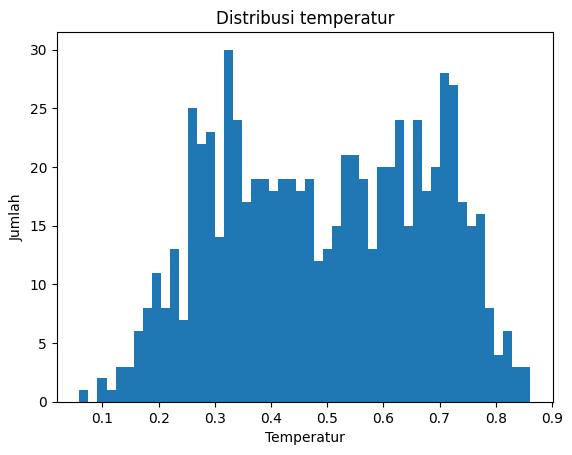

In [13]:
plt.hist(day_df['temp'], bins=50)
plt.xlabel('Temperatur')
plt.ylabel('Jumlah')
plt.title('Distribusi temperatur')

Diatas adalah histogram distribusi temperatur x axis nya adalah angka temperatur dan y axis nya adalah jumlah per temperatur

Text(0.5, 1.0, 'Distribusi user')

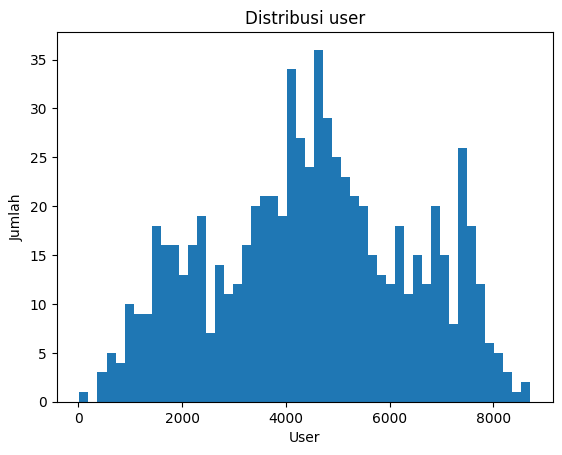

In [14]:
plt.hist(day_df['cnt'], bins=50,)
plt.xlabel('User')
plt.ylabel('Jumlah')
plt.title('Distribusi user')

Diatas ini adalah histogram dari distribusi user dengan x axis menunjukkan jumlah user dan y axis menunjukkan jumlah data

In [15]:
print(day_df.groupby('weekday')['cnt'].describe())

           count         mean          std     min      25%     50%      75%  \
weekday                                                                        
Sunday     105.0  4228.828571  1872.496629   605.0  2918.00  4334.0  5464.00   
Monday     105.0  4338.123810  1793.074013    22.0  3310.00  4359.0  5875.00   
Tuesday    104.0  4510.663462  1826.911642   683.0  3579.25  4576.5  5769.00   
Wednesday  104.0  4548.538462  2038.095884   441.0  2653.25  4642.5  6175.75   
Thursday   104.0  4667.259615  1939.433317   431.0  3270.75  4721.0  6286.00   
Friday     104.0  4690.288462  1874.624870  1167.0  3390.75  4601.5  5900.50   
Saturday   105.0  4550.542857  2196.693009   627.0  2732.00  4521.0  6140.00   

              max  
weekday            
Sunday     8227.0  
Monday     7525.0  
Tuesday    7767.0  
Wednesday  8173.0  
Thursday   7804.0  
Friday     8362.0  
Saturday   8714.0  


<ipython-input-15-12db24cffde3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(day_df.groupby('weekday')['cnt'].describe())


Untuk pertanyaan 2, Mengeksplor data weekday dan cnt dengan menunjukkan data terkait jumlah user per hari nya. bisa dilihat mean paling tinggi berada di hari jumat. dan data tertinggi ada di hari sabtu dengan jumlah 8714 user.

In [16]:
weekday_average_count = day_df.groupby('weekday')['cnt'].mean()

<ipython-input-16-0ff5e4143830>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_average_count = day_df.groupby('weekday')['cnt'].mean()


mengelompokkan data untuk mempermudah membuat plot untuk visualisasi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [17]:
tempcorrelation = day_df['temp'].corr(day_df['cnt'])
print(f"correlation : {tempcorrelation}")

correlation : 0.6274940090334918


Text(0.5, 1.0, 'Perbandingan antara temperatur dan jumlah user')

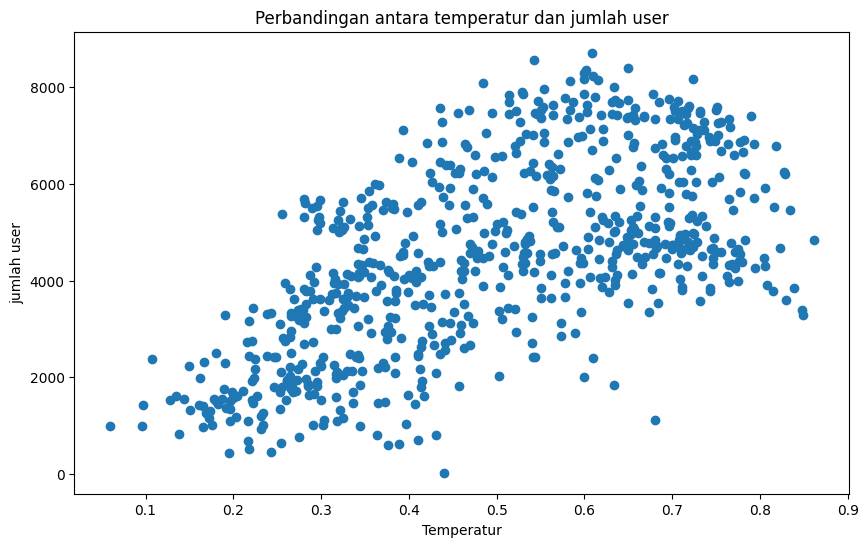

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(day_df['temp'],day_df['cnt'])
plt.xlabel('Temperatur')
plt.ylabel('jumlah user')
plt.title('Perbandingan antara temperatur dan jumlah user')

Diatas merupakan hasil corellation dan scatter plot antara temperatur dengan jumlah user .


### Pertanyaan 2:

Text(0.5, 1.0, 'Rata-rata jumlah user per hari')

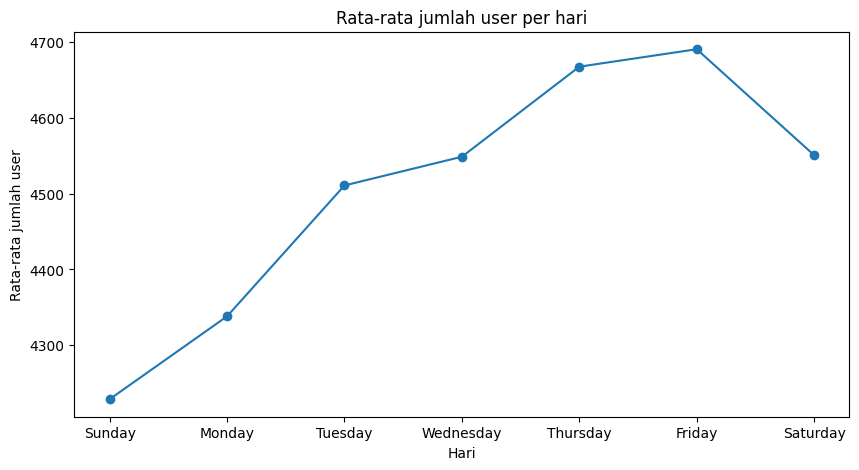

In [19]:
plt.figure(figsize=(10,5))
weekday_average_count.plot(kind='line',marker='o')
plt.xlabel('Hari')
plt.ylabel('Rata-rata jumlah user')
plt.title('Rata-rata jumlah user per hari')

Diatas adalah visualisas rata-rata jumlah user yang menyewa sepeda per hari

## Analisis Lanjutan (Opsional)

## Conclusion


- kesimpulan untuk pertanyaan 1  : Dapat disimpulkan dari hasil korelasi koefisien dan scatter plot sebagai visualisasinya bahwa terdapat korelasi koefisien yang cukup positif antara temperatur dan jumlah user . Hal ini berarti bahwa umumnya semakin tinggi temperatur berarti semakin banyak jumlah user yang menyewa . Namun karena hasilnya hanya 0.62749... berarti hubungannya tidak terlalu kuat sehingga menandakan ada faktor-faktor lain yang mempengaruhi jumlah user selain temperatur.
- kesimpulan untuk pertanyaan 2 : rata-rata tertinggi untuk jumlah penyewaan sepeda per hari-nya ada di hari jumat , dan kedua tertinggi yang tak jauh perbedaan nya ada di hari kamis . Sedangkat hari dengan jumlah terendah ada di hari minggu .

Kedua data ini bisa digunakan untuk mengatur alokasi sumber daya yang disediakan untuk bisnis tersebut . Jika temperatur lebih tinggi , umumnya akan terdapat lebih banyak user yang menyewa . Kalau berdasarkan hari, umumnya kamis dan jumat adalah hari yang tepat untuk menambahkan alokasi sumber daya, sedangkan di hari minggu bisa dikurangkan.

## Dashboard

In [20]:
day_df.to_csv("updateday_df.csv", index=False)